# **1. Perkenalan Dataset**


Dataset ini berisi data terkait lebih dari 4700 properti sewa di India, termasuk rumah, apartemen, dan flat. Data ini mencakup berbagai atribut properti, seperti jumlah kamar tidur (BHK), harga sewa, ukuran properti, jumlah lantai, area, kota, status furnitur, preferensi penyewa, jumlah kamar mandi, dan informasi kontak pemilik.

**Ketentuan Dataset:**
- **Tanpa label**: Dataset ini tidak memiliki label atau kelas.
- **Jumlah Baris**: Dataset terdiri dari lebih dari 1000 baris, yang memungkinkan analisis yang bermakna.
- **Tipe Data**: Dataset ini mengandung data numerikal (seperti harga sewa dan ukuran) dan kategorikal (seperti area dan status furnitur).

**Sumber Dataset**:  
[House Rent Prediction Dataset di Kaggle](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset)

**Penjelasan Dataset:**
- **BHK**: Jumlah kamar tidur, ruang tamu, dan dapur.
- **Rent**: Harga sewa properti.
- **Size**: Ukuran properti dalam meter persegi.
- **Area Type**: Jenis area properti (Super Area, Carpet Area, atau Build Area).
- **Area Locality**: Lokasi properti.
- **City**: Kota tempat properti berada.
- **Furnishing Status**: Status furnitur properti (Furnished, Semi-Furnished, Unfurnished).
- **Tenant Preferred**: Tipe penyewa yang diinginkan.
- **Bathroom**: Jumlah kamar mandi.
- **Point of Contact**: Kontak untuk informasi lebih lanjut.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
# Memuat dataset
file_path = "/content/House_Rent_Dataset.csv"
df = pd.read_csv(file_path)

print(df.head())
print(df.info())

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# Memahami struktur dat
print(f"Jumlah baris dan kolom: {df.shape}")
print(df.describe())

Jumlah baris dan kolom: (4746, 12)
               BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
std       0.832256  7.810641e+04   634.202328     0.884532
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000  3.300000e+04  1200.000000     2.000000
max       6.000000  3.500000e+06  8000.000000    10.000000


In [6]:
# Mengidentifikasi jumlah data kosong
missing_values = df.isnull().sum()
print(f"Data kosong:\n{missing_values}")

Data kosong:
Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


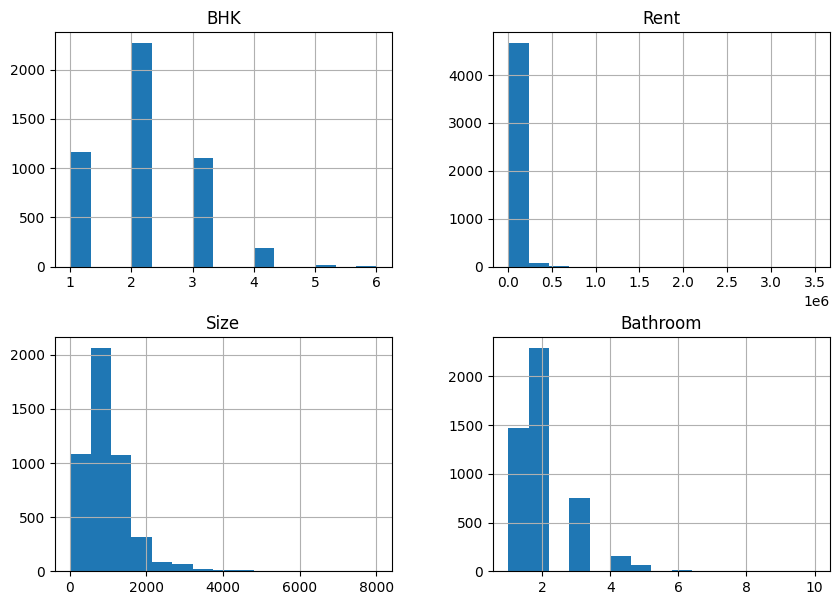

In [7]:
# Visualisasi distribusi data numerik menggunakan histogram
numerical_cols = ['BHK', 'Rent', 'Size', 'Bathroom']
df[numerical_cols].hist(bins=15, figsize=(10, 7))
plt.show()

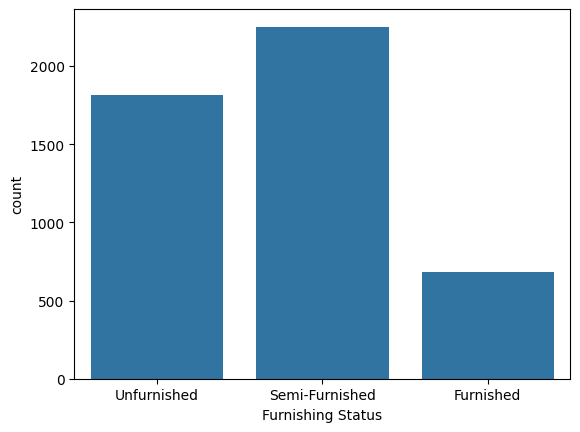

In [8]:
# Visualisasi distribusi kategori 'Furnishing Status' menggunakan diagram batang
sns.countplot(x='Furnishing Status', data=df)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [9]:
# Menghapus baris dengan nilai kosong pada kolom penting dan menghapus duplikasi data
df.dropna(subset=['BHK', 'Rent', 'Size', 'Bathroom'], inplace=True)
df.drop_duplicates(inplace=True)

In [10]:
# Mengkodekan kolom kategorikal menjadi bentuk numerik
df_encoded = pd.get_dummies(df[['Furnishing Status', 'Area Type', 'City', 'Tenant Preferred']], drop_first=True)

# Membuat fitur baru 'Price per Square Foot'
df['Price per Square Foot'] = df['Rent'] / df['Size']

# Memilih kolom numerik dan kategorikal yang relevan untuk analisis
numerical_features = ['BHK', 'Rent', 'Size', 'Bathroom', 'Price per Square Foot']
X = pd.concat([df[numerical_features], df_encoded], axis=1)

# Mengubah tipe data menjadi integer agar siap digunakan dalam model
X = X.astype(int)
X.head()

,BHK,Rent,Size,Bathroom,Price per Square Foot,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,2,10000,1100,2,9,0,1,0,1,0,0,0,1,0,1,0
1,2,20000,800,1,25,1,0,0,1,0,0,0,1,0,1,0
2,2,17000,1000,1,17,1,0,0,1,0,0,0,1,0,1,0
3,2,10000,800,1,12,0,1,0,1,0,0,0,1,0,1,0
4,2,7500,850,1,8,0,1,1,0,0,0,0,1,0,0,0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

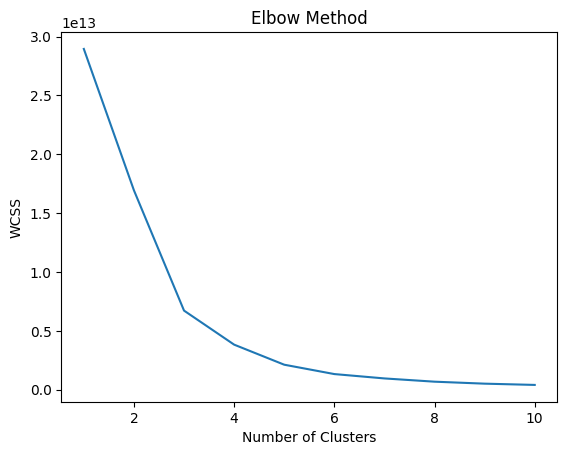

In [11]:
# Menggunakan KMeans untuk menemukan kelompok (cluster) dalam data
# Menentukan jumlah cluster optimal dengan metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

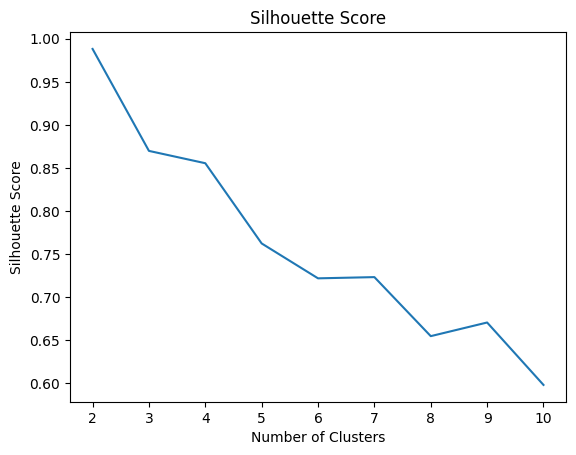

In [12]:
# Menggunakan Silhouette Score untuk mengevaluasi kualitas cluster
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [14]:
# Memilih jumlah cluster yang optimal, misalnya 4
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Menambahkan label cluster ke dalam dataset
X['Cluster'] = y_kmeans

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [15]:
# Menghitung Silhouette Score untuk menilai kualitas dari clustering yang telah dilakukan
score = silhouette_score(X.drop('Cluster', axis=1), y_kmeans)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.8555479140565249


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

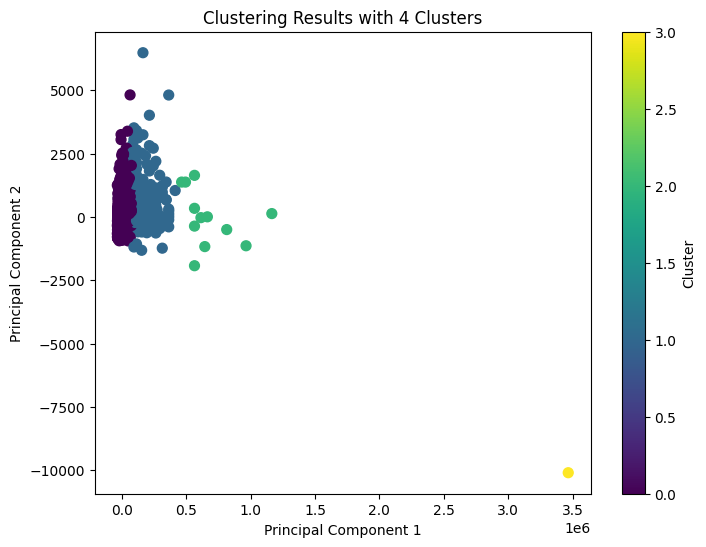

In [16]:
# Menggunakan PCA untuk mereduksi dimensi dan memvisualisasikan hasil clustering dalam 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.drop('Cluster', axis=1))

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.title(f'Clustering Results with {optimal_clusters} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [17]:
# Mengelompokkan data berdasarkan cluster dan menganalisis karakteristik rata-rata dari setiap cluster
cluster_summary = X.groupby('Cluster').mean()

print("Summary of Average Features per Cluster:")
print(cluster_summary)

Summary of Average Features per Cluster:
              BHK          Rent         Size  Bathroom  Price per Square Foot  \
Cluster                                                                         
0        2.005133  2.303256e+04   901.012051  1.861192              33.277840   
1        3.380952  2.018254e+05  2036.904762  3.710317             122.730159   
2        4.166667  7.091667e+05  3206.333333  4.333333             255.166667   
3        3.000000  3.500000e+06  2500.000000  3.000000            1400.000000   

         Furnishing Status_Semi-Furnished  Furnishing Status_Unfurnished  \
Cluster                                                                    
0                                0.469761                       0.395894   
1                                0.547619                       0.158730   
2                                0.583333                       0.083333   
3                                1.000000                       0.000000   

         Area T

Tulis hasil interpretasinya di sini.
1. **Cluster 0**:
Cluster ini terdiri dari properti dengan rata-rata 2 ruangan (BHK), harga sewa rata-rata sebesar Rp 23,032,556, dan ukuran rata-rata 901 kaki persegi. Harga per kaki persegi sekitar Rp 33,280. Sebagian besar properti di cluster ini semi-furnished (47%), dengan sebagian besar menggunakan Super Area (54%) daripada Carpet Area. Properti tersebar di beberapa kota, dengan jumlah terbesar di Hyderabad (19%). Penyewa lebih banyak memilih tipe Bachelors/Family (73%).

2. **Cluster 1**:
Cluster ini mencakup properti dengan rata-rata 3 ruangan (BHK), harga sewa rata-rata Rp 201,825,400, dan ukuran rata-rata 2,037 kaki persegi. Harga per kaki persegi sekitar Rp 122,730. Mayoritas properti semi-furnished (55%) dan lebih banyak menggunakan Carpet Area (87%) dibandingkan Super Area. Sebagian besar properti berada di Mumbai (74%). Penyewa lebih memilih tipe Bachelors/Family (62%).

3. **Cluster 2**:
Properti dalam cluster ini memiliki rata-rata 4 ruangan (BHK), harga sewa rata-rata Rp 709,166,667, dan ukuran rata-rata 3,206 kaki persegi. Harga per kaki persegi sekitar Rp 255,170. Mayoritas properti semi-furnished (58%) dan semuanya menggunakan Carpet Area (100%). Sebagian besar properti berada di Mumbai (83%). Penyewa lebih memilih tipe Bachelors/Family (75%).

4. **Cluster 3**:
Cluster ini memiliki properti dengan rata-rata 3 ruangan (BHK), harga sewa yang sangat tinggi sebesar Rp 3,500,000,000, dan ukuran rata-rata 2,500 kaki persegi. Harga per kaki persegi sangat tinggi, yaitu Rp 1,400,000. Semua properti di cluster ini semi-furnished (100%) dan menggunakan Carpet Area (100%).

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
X.to_csv('clustered_data.csv', index=False)